<a href="https://colab.research.google.com/github/maritaca-ai/maritalk-api/blob/main/examples/api/maritalk_via_requisições_https.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Este notebook demonstra como usar a API da Maritalk, um chatbot desenvolvido pela Maritaca AI, através de requisições HTTP.

In [ ]:
import requests

url = "https://chat.maritaca.ai/api/chat/inference"

# Formato das mensagens

O formato usado pela API da MariTalk é bem parecido com a do ChatGPT. Você pode definir uma conversa especificando uma lista de objetos, sendo que cada objeto tem 2 atributos: content e role.

Atualmente, a API da MariTalk suporta dois tipos de role: "user" para mensagens do usuário, e "assistant" para mensagens do assistente. Futuramente adicionaremos suporte para o role "system" onde você poderá instruir como o assistente deve se comportar.

In [ ]:
messages = [
    {"role": "user", "content": "bom dia, esta é a mensagem do usuario"},
    {"role": "assistant", "content": "bom dia, esta é a resposta do assistente"},
    {"role": "user", "content": "Você pode me falar quanto é 25 + 27?"},
]

# API Key

Para usar a API, você precisa de uma chave de API, que você pode conseguir seguindo os seguintes passos:
1. Acesse chat.maritaca.ai
2. No menu inferior esquerdo, clique em "Chaves da API":
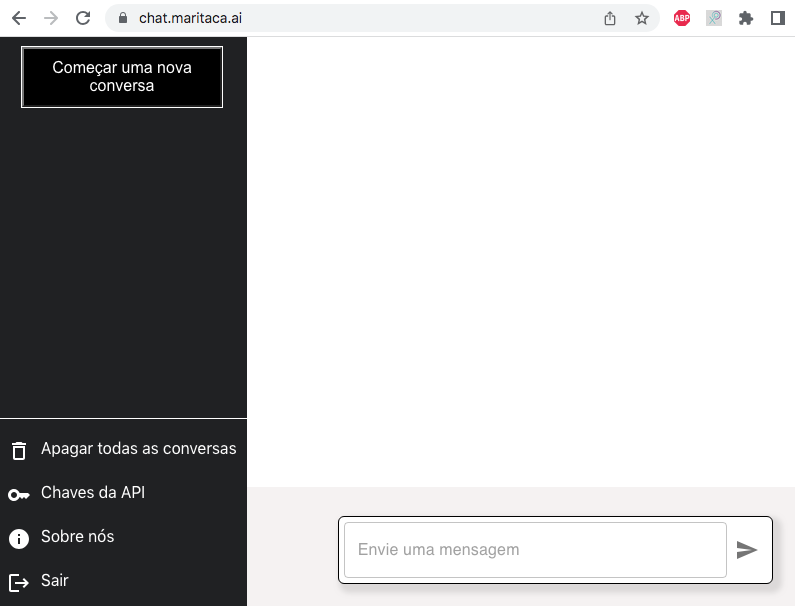
3. Clique em "Create a key". A chave será copiada a área de transferência. Basta colá-la na célula abaixo.

In [ ]:
my_key = ""  # Coloque aqui a sua chave de API (ex: "10035481...").

auth_header = {
    "authorization": f"Key {my_key}"
}

# Requisição

Você pode usar o código abaixo para fazer uma requisição na API.

Você pode especificar a maioria dos parametros de geração tradicionais (temperature, top_p, etc). A lista completa de parâmetros pode ser encontrada em https://chat.maritaca.ai/docs


In [ ]:
request_data = {
  "messages": messages,
  "do_sample": True,
  'max_tokens': 200,
  "temperature": 0.7,
  "top_p": 0.95,
  "model": "sabia-2-medium",
}


def get_maritalk_response(request_data, headers):
  response = requests.post(
      url,
      json=request_data,
      headers=headers
  )

  if not response.ok:
    raise Exception(f"Request failed with status code {response.status_code}: {response.text}")
  return response.json()

response = get_maritalk_response(request_data, auth_header)
print(response["answer"])


Se o seu request for negado devido a excesso de chamadas, você receberá um erro http 429.

## Usando exemplos few-shot

Embora a MariTalk seja capaz de responder a instruções sem nenhum exemplo de demonstração, fornecer alguns exemplos da tarefa pode melhorar significativamente a qualidade de suas respostas.

Como o modelo foi treinado para diálogo, é recomendado que os exemplos few-shot sejam passados como se fossem uma conversa entre um usuário e um assistente "ideal", ou seja, aquele que sempre fornece a resposta correta para a entrada do usuário.

A seguir mostraremos como isso é feito para uma tarefa simples de análise de sentimento, i.e., classificar se uma resenha de filme é positiva ou negativa.
Neste caso, passaremos dois exemplos few-shot, um positivo e outro negativo, e um terceiro exemplo, para o qual a MariTalk efetivamente fará a predição.

In [ ]:
messages = """Classifique a resenha de filme como "positiva" ou "negativa".

Resenha: Gostei muito do filme, é o melhor do ano!
Classe: positiva

Resenha: O filme deixa muito a desejar.
Classe: negativa

Resenha: Apesar de longo, valeu o ingresso..
Classe:"""

request_data = {
  "messages": messages,
  "do_sample": False,  # Não usamos amostragem nesta tarefa pois a saída deve ser a mais provável possível.
  "max_tokens": 10,
  "chat_mode": False,
  "stopping_tokens": ["\n"],
  "model": "sabia-2-medium",
}

response = get_maritalk_response(request_data, auth_header)
print(response["answer"])

Note que usamos `chat_mode=False``, pois melhora a qualidade das respostas quando usando exemplos few-shot.

O argumento `stopping_tokens=["\n"]` é usado para interromper a geração quando o token "\n" é gerado. Isso é necessário porque, quando não estamos no modo chat, o modelo pode não saber quando interromper a geração.

Para tarefas com apenas uma resposta correta, como no exemplo acima, é recomendado usar do_sample=False. Isso garante que a mesma resposta seja gerada dado um prompt específico.

Para tarefas de geração de textos diversos ou longos, é recomendado usar do_sample=True e temperature=0.7. Quanto maior a temperatura, mais diversos serão os textos gerados, mas há maior chance de o modelo "alucinar" e gerar textos sem sentido. Quanto menor a temperatura, a resposta é mais conservadora, mas corre o risco de gerar textos repetidos.